In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Project Summary:
### Project Description:  Content-based Recommender Using Natural Language Processing (NLP)
- The project involves building a recommendation system for Walmart based on a sample dataset that contains information about their products. The dataset link is https://data.world/promptcloud/product-listing-walmart/workspace/file?filename=marketing_sample_for_walmart_com-walmart_com_product__20210401_20210430__30k_data.csv.
- It will be development of  a recommendation system that suggests products that are similar to the one selected by the user. Since we do not have access to user data, we will be basing our recommendations solely on the product attributes such as title, ratings, number of ratings, and manufacturer.  
- In order to achieve this, the Product title and description will give much information about the product being selected hence they will contribute greatly to the project. The model will be designed to identify products that share similar characteristics and recommend them to the user. Models that might be used is KNN or COsine Similarity based algorithm. 
- After building the model, a simple UI will then be used to allow someone to enter the ProductID and get the recommendations. The UI is just to showcase how the application can be intergrated to walmart site.

#### But What is Recommendation System ?
- Recommender/recommendation system is a subclass of information filtering system that seeks to predict the rating or preference a user would give to an item.
- They are primarily used in applications where a person/ entity is involved with a product/ service. 

### Content based recommender system¶
- THis is what we will be building in this project. It will be recommending products to use based on similarity with what he has selected ie recommends content based on product description and title. 
- Here we would convert products titles  and prescription into a vector to find its cosine similarity. Similar products would have a high cosine similarity and thus would be recommended to the user.


---



---
### The working Outline
- To build a recommendation system using collaborative filtering for a dataset with textual features, such as 'Specification' and 'Title', you can follow these general steps:

### 1. Preprocessing the textual data:

    - Remove stop words
    - Stemming and Lemmatization
    - Vectorization and Encoding using  TF-IDF or word embeddings


### 2.Split the dataset into training and testing sets:
    - To evaluate the model, a specific product id will be selected for comparison.


### 3. Create a product-item matrix:
    - Convert the textual data into numerical features using the vectorization method from step 1.
    - Create a product-item matrix where the rows represent the products and the columns represent the items.
    - Fill the matrix with the numerical features of each item.


### 4.Compute similarity:
    - Calculate the similarity between items using cosine similarity, Jaccard similarity or any other similarity metric.
    - Alternatively, you can use dimensionality reduction techniques such as Singular Value Decomposition (SVD) or Non-negative Matrix Factorization (NMF) to compute item similarity.


### 5. Make recommendations:
    - Given a user, compute the similarity between the items that the user has interacted with and the items that they have not interacted with.
    - Sort the items by similarity and recommend the top items to the user.


### 6. Evaluate the model:
    - Evaluation will be comparisons of the output bettween the two models on a specific prododuct recommendation



- In summary, to build a recommendation system using collaborative filtering for a dataset with textual features, you need to preprocess the data, split the dataset into training and testing sets, create a user-item matrix, compute similarity, make recommendations, and evaluate the model.

In [8]:
# !wget https://query.data.world/s/hp7nmzeytcg36t6x66emz4cvymcl2t?dws=00000

In [9]:
import os
os.listdir("./")

['.config', 'drive', 'sample_data']

In [10]:

!pip install rake_nltk
# install neattext for automatic tweets processing
!pip install neattext --q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:

# Import All the Libraries for The development...

# data manipulation
import pandas as pd
import numpy as np

# plotting and staffs
import seaborn as sns
import matplotlib.pyplot as plt


# nlp libraries
import nltk
from sklearn.metrics.pairwise import linear_kernel
import wordcloud as wc

# similarities
from sklearn.metrics.pairwise import cosine_similarity
import scipy.sparse as sparse

# dimension reduction
from sklearn.decomposition import PCA , TruncatedSVD
# feature extration from text
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer


from rake_nltk import Rake


# load neattext functions for processing
import neattext.functions as nfx
import re


import warnings
warnings.filterwarnings("ignore")

In [12]:
# read the data
df = pd.read_csv("/content/drive/MyDrive/marketing_sample_for_walmart_com-walmart_com_product__20210401_20210430__30k_data.csv")

In [13]:
# check the number of instances
df.shape

(29997, 29)

In [14]:
# check sample records from the data
df.sample(4)

,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Num Of Reviews,Average Rating,Number Of Ratings,Model Num,Sku,...,Screen Size,Specifications,Five Star,Four Star,Three Star,Two Star,One Star,Discontinued,Broken Link,Joining Key
10936,402208a4b0de29d05f5d4dac5073605a,2021-04-05 04:26:13 +0000,https://www.walmart.com/ip/Silk-Scarf-Band-for...,walmart.com,Posh Tech Silk Scarf Band for Apple Watch,0.0,NaN,0.0,NaN,671299373,...,NaN,Brand : Posh Tech | Manufacturer : POSH TECH,NaN,NaN,NaN,NaN,NaN,False,False,415a0ce3a331bf3d435c86edecb79925
2391,f3dd4bfdb92ac7595c32df663be342f1,2021-04-06 14:16:10 +0000,https://www.walmart.com/ip/Thermostat-Temperat...,walmart.com,Anself Thermostat Temperature Controller LCD D...,0.0,NaN,0.0,NaN,479870075,...,NaN,Brand : Anself,NaN,NaN,NaN,NaN,NaN,False,False,a76cd1fc47fa096d45175cd20c42c71d
19551,60890d1a63726056f2240193d18da5d2,2021-04-06 16:22:27 +0000,https://www.walmart.com/ip/Wireless-Video-Door...,walmart.com,Groomer Wireless Video Doorbell with WiFi Secu...,0.0,NaN,0.0,NaN,869912894,...,NaN,Brand : Groomer,NaN,NaN,NaN,NaN,NaN,False,False,aed0a0050993b1825aee38460a7d4d51
26793,a91157f7a235b33c54fa4bef71217750,2021-04-05 20:24:33 +0000,https://www.walmart.com/ip/Gaia-Herbs-Olive-Le...,walmart.com,Gaia Herbs (4 Pack) Gaia Herbs Olive Leaf Phyt...,0.0,NaN,0.0,751063399401,893736411,...,NaN,Brand : Gaia Herbs | Manufacturer : Gaia Herbs,NaN,NaN,NaN,NaN,NaN,False,False,908b1b8c99d052fe0d73c618b1baf261


In [15]:
# columns present
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Pageurl', 'Website', 'Title',
       'Num Of Reviews', 'Average Rating', 'Number Of Ratings', 'Model Num',
       'Sku', 'Upc', 'Manufacturer', 'Model Name', 'Price', 'Monthly Price',
       'Stock', 'Carrier', 'Color Category', 'Internal Memory', 'Screen Size',
       'Specifications', 'Five Star', 'Four Star', 'Three Star', 'Two Star',
       'One Star', 'Discontinued', 'Broken Link', 'Joining Key'],
      dtype='object')

In [16]:
df['Uniq Id'].nunique()

29997

In [17]:
# keep a copy of the whole data
df_copy = df.copy()

In [18]:
# get only the columns to be used
COLS = ['Uniq Id', 'Title','Specifications', 'Num Of Reviews', 'Average Rating', 'Number Of Ratings']

COLS

['Uniq Id',
 'Title',
 'Specifications',
 'Num Of Reviews',
 'Average Rating',
 'Number Of Ratings']

In [19]:
# get a new dataframe with only our required columns
df = df[COLS]

In [20]:
# FOR THE REVIEW AND RATIONG DETAILS, LETS FILL NULLS WITH ZEROS.
df[['Num Of Reviews', 'Average Rating', 'Number Of Ratings']] =  df[['Num Of Reviews', 'Average Rating', 'Number Of Ratings']].fillna(0)

In [21]:
# merge the Specification with Title
df ['description']  =  df["Title"] + "  " + df["Specifications"]

In [22]:
# delete
df.drop(columns =["Title", "Specifications"], axis=1, inplace=True)

In [23]:
# drop all columns with nulls 
df.dropna(inplace=True)

In [24]:
df.isna().sum()

Uniq Id              0
Num Of Reviews       0
Average Rating       0
Number Of Ratings    0
description          0
dtype: int64

In [25]:
df['description'].fillna("missing vales", inplace=True)

In [26]:
df.head()

,Uniq Id,Num Of Reviews,Average Rating,Number Of Ratings,description
0,9b79f87a82b4ebfcfe1d9ecc72b9d832,0.0,0.0,0.0,Barka Ave Barka Ave Case for Samsung Galaxy Ta...
1,cb4a40c55d58f0288ac0ff6d403f7e27,0.0,0.0,0.0,Suzicca Suzicca T2US2C-TX 2 Gang Smart WiFi Wa...
2,3bd097d980823e2a469237419dd6674d,0.0,0.0,0.0,Romacci Romacci 1080P WIFI Digital 1000x Micro...
3,4b58151b811a954f29e1e39290615fd4,0.0,0.0,0.0,Morease Smart Watch Sleep Monitoring Fitness-T...
4,d2238f0d3864e864c2579583aa2af7f7,0.0,0.0,0.0,Microsoft Microsoft Surface Go Signature Type ...


In [27]:
# check shape
df.shape

(28927, 5)

### Text Processing.
- In this case, the textual data will be processed such that their content is clean.
- Neartext will be used for this purpose. It will remove all unrequired contents from the text

In [28]:
def remove_unwanted_content(text):
    #remove multiple spaces
    text = text.strip()
    text = nfx.remove_multiple_spaces(text)
    #remove urls
    text = nfx.remove_urls(text)
    #remove punctuations
    text = nfx.remove_puncts(text)

    return text


# clearning the text
# create a function that will perform text processing.
# This will involve removing stopwords tags, links, non english characters, punctuations, multiple spaces etc.
def clean_all_text(text):
    """
    This function removes any stopwords in the text
    It also removes punctuations
    """
    #Remove HTML elements
    text = text.replace(r"<[a-z/]+>", " ")
    # Remove special characters and numbers
    text = text.replace(r"[^A-Za-z]+", " ")
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize the text into words
    words = text.lower().split()
    words = [word for word in words if len(word)>3]
    return " ".join(words)



# a function to extract only keyword from the product description
nltk.download('stopwords')
nltk.download('punkt')

# get all keywords
def extract_keywords(text):
    #instantiating Rake by default it uses English stopwords from NLTK and discards all punctuation chars
    r = Rake()
    
    #extract words by passing the text
    r.extract_keywords_from_text(text)
    
    #get the dictionary with key words and their scores
    keyword_dict_scores = r.get_word_degrees()
    
    #assign keywords to new columns
    return " ".join(list(keyword_dict_scores.keys()))


#apply the above functions

df['clean_text'] = df['description'].apply(clean_all_text)
df['clean_text'] = df['clean_text'].apply(remove_unwanted_content)


# EXTRACT THE KEYWORDS
df['clean_text'] = df['clean_text'].apply(extract_keywords)


# check the new data
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Uniq Id,Num Of Reviews,Average Rating,Number Of Ratings,description,clean_text
0,9b79f87a82b4ebfcfe1d9ecc72b9d832,0.0,0.0,0.0,Barka Ave Barka Ave Case for Samsung Galaxy Ta...,barka case samsung galaxy inch 2019 t515 t510 ...
1,cb4a40c55d58f0288ac0ff6d403f7e27,0.0,0.0,0.0,Suzicca Suzicca T2US2C-TX 2 Gang Smart WiFi Wa...,suzicca t2us2c gang smart wifi wall light swit...
2,3bd097d980823e2a469237419dd6674d,0.0,0.0,0.0,Romacci Romacci 1080P WIFI Digital 1000x Micro...,romacci 1080p wifi digital 1000x microscope ad...
3,4b58151b811a954f29e1e39290615fd4,0.0,0.0,0.0,Morease Smart Watch Sleep Monitoring Fitness-T...,morease smart watch sleep monitoring fitness t...
4,d2238f0d3864e864c2579583aa2af7f7,0.0,0.0,0.0,Microsoft Microsoft Surface Go Signature Type ...,microsoft surface signature type cover burgund...


In [29]:
# set the product ID as the unique key.
# THis is the key that will be used to check similarity.
df.set_index('Uniq Id', inplace = True)
df.head()

,Num Of Reviews,Average Rating,Number Of Ratings,description,clean_text
Uniq Id,,,,,
9b79f87a82b4ebfcfe1d9ecc72b9d832,0.0,0.0,0.0,Barka Ave Barka Ave Case for Samsung Galaxy Ta...,barka case samsung galaxy inch 2019 t515 t510 ...
cb4a40c55d58f0288ac0ff6d403f7e27,0.0,0.0,0.0,Suzicca Suzicca T2US2C-TX 2 Gang Smart WiFi Wa...,suzicca t2us2c gang smart wifi wall light swit...
3bd097d980823e2a469237419dd6674d,0.0,0.0,0.0,Romacci Romacci 1080P WIFI Digital 1000x Micro...,romacci 1080p wifi digital 1000x microscope ad...
4b58151b811a954f29e1e39290615fd4,0.0,0.0,0.0,Morease Smart Watch Sleep Monitoring Fitness-T...,morease smart watch sleep monitoring fitness t...
d2238f0d3864e864c2579583aa2af7f7,0.0,0.0,0.0,Microsoft Microsoft Surface Go Signature Type ...,microsoft surface signature type cover burgund...


In [30]:
# get the maximum and minumum number of chars per record
df['clean_text'].apply(len).max(), df['clean_text'].apply(len).min()

(1714, 10)

Text(0.5, 1.0, 'Length of Sentenses Present')

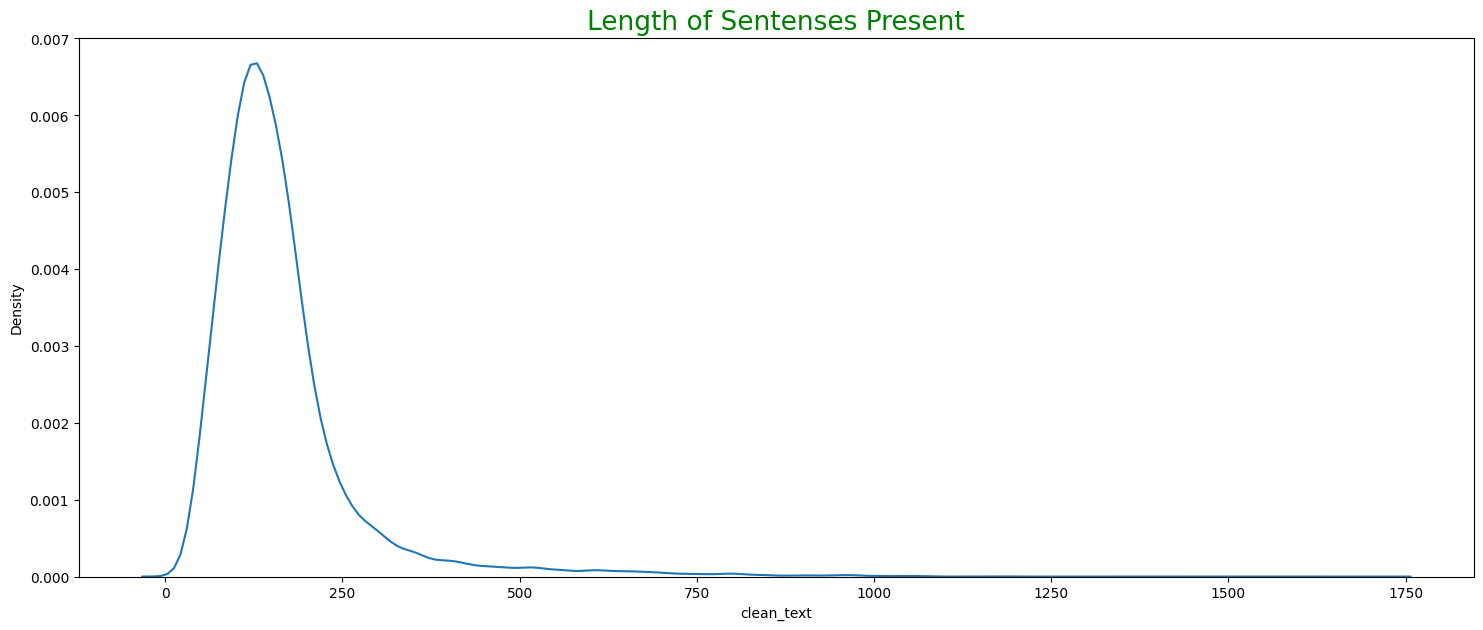

In [31]:
# get length of chars as per record
plt.figure(figsize=(18,7))
sns.kdeplot(x = df['clean_text'].astype(str).apply(len), palette="Set1")
plt.title("Length of Sentenses Present", fontsize=19, c='g')

Text(0.5, 1.0, 'Average Number of Words Per Record')

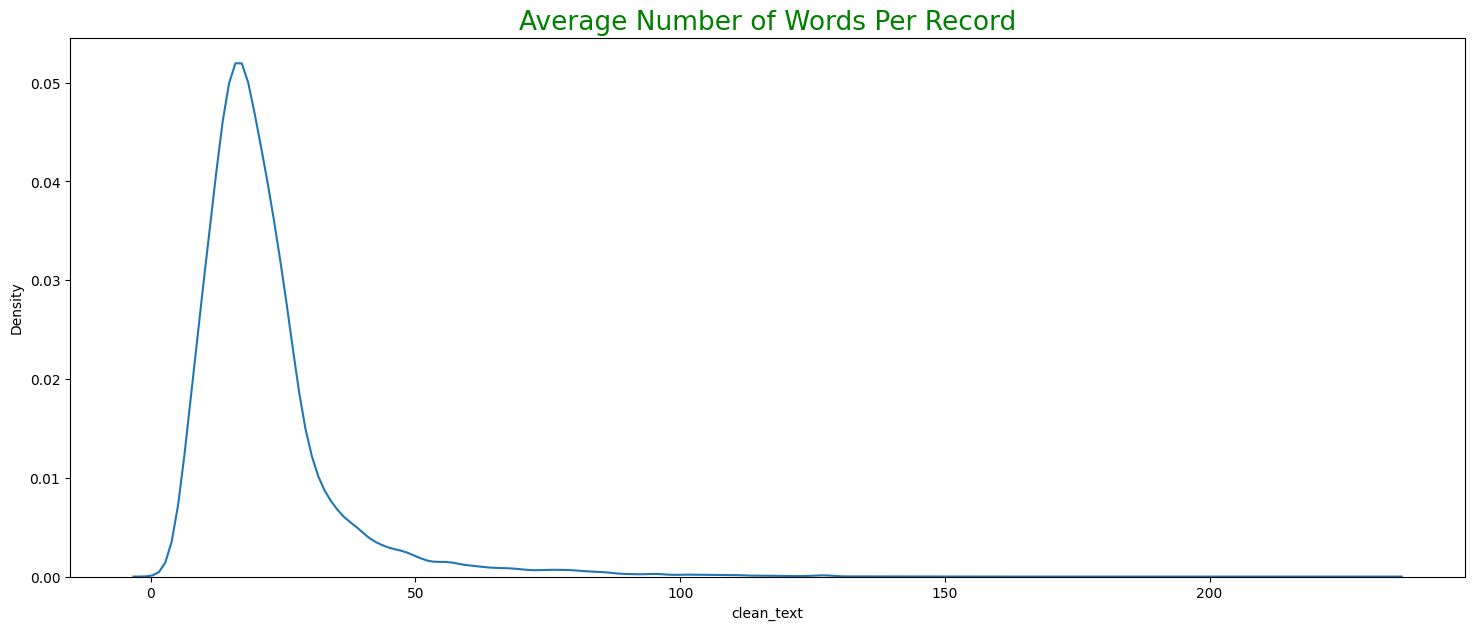

In [32]:
# Average numberof words per recod
plt.figure(figsize=(18,7))
sns.kdeplot(x = df['clean_text'].astype(str).apply(lambda x: len(x.split())), palette="Set1")
plt.title("Average Number of Words Per Record", fontsize=19, c='g')

In [33]:
# function to plot barplot on the either model names or manufactures
def create_bar_plots(df, col_name , title, max_values =20 ):  
    """
    Function to plot bar graph
    """
    all_counts= df[col_name].dropna().value_counts()
    #sort them
    all_counts=sorted(all_counts.items(),key=lambda x:x[1],reverse=True)
    
    #get the top max_values words
    top_n_counts=dict(all_counts[:max_values])
    f, ax = plt.subplots(figsize=(20, 6))
    plt.title(f"{title}" , c ='r' ,fontsize = 17)
    plt.xticks(rotation=75, fontsize=15 , c='r')
    plt.bar(top_n_counts.keys() , top_n_counts.values() , align ='center' , color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'purple'])
    plt.show()

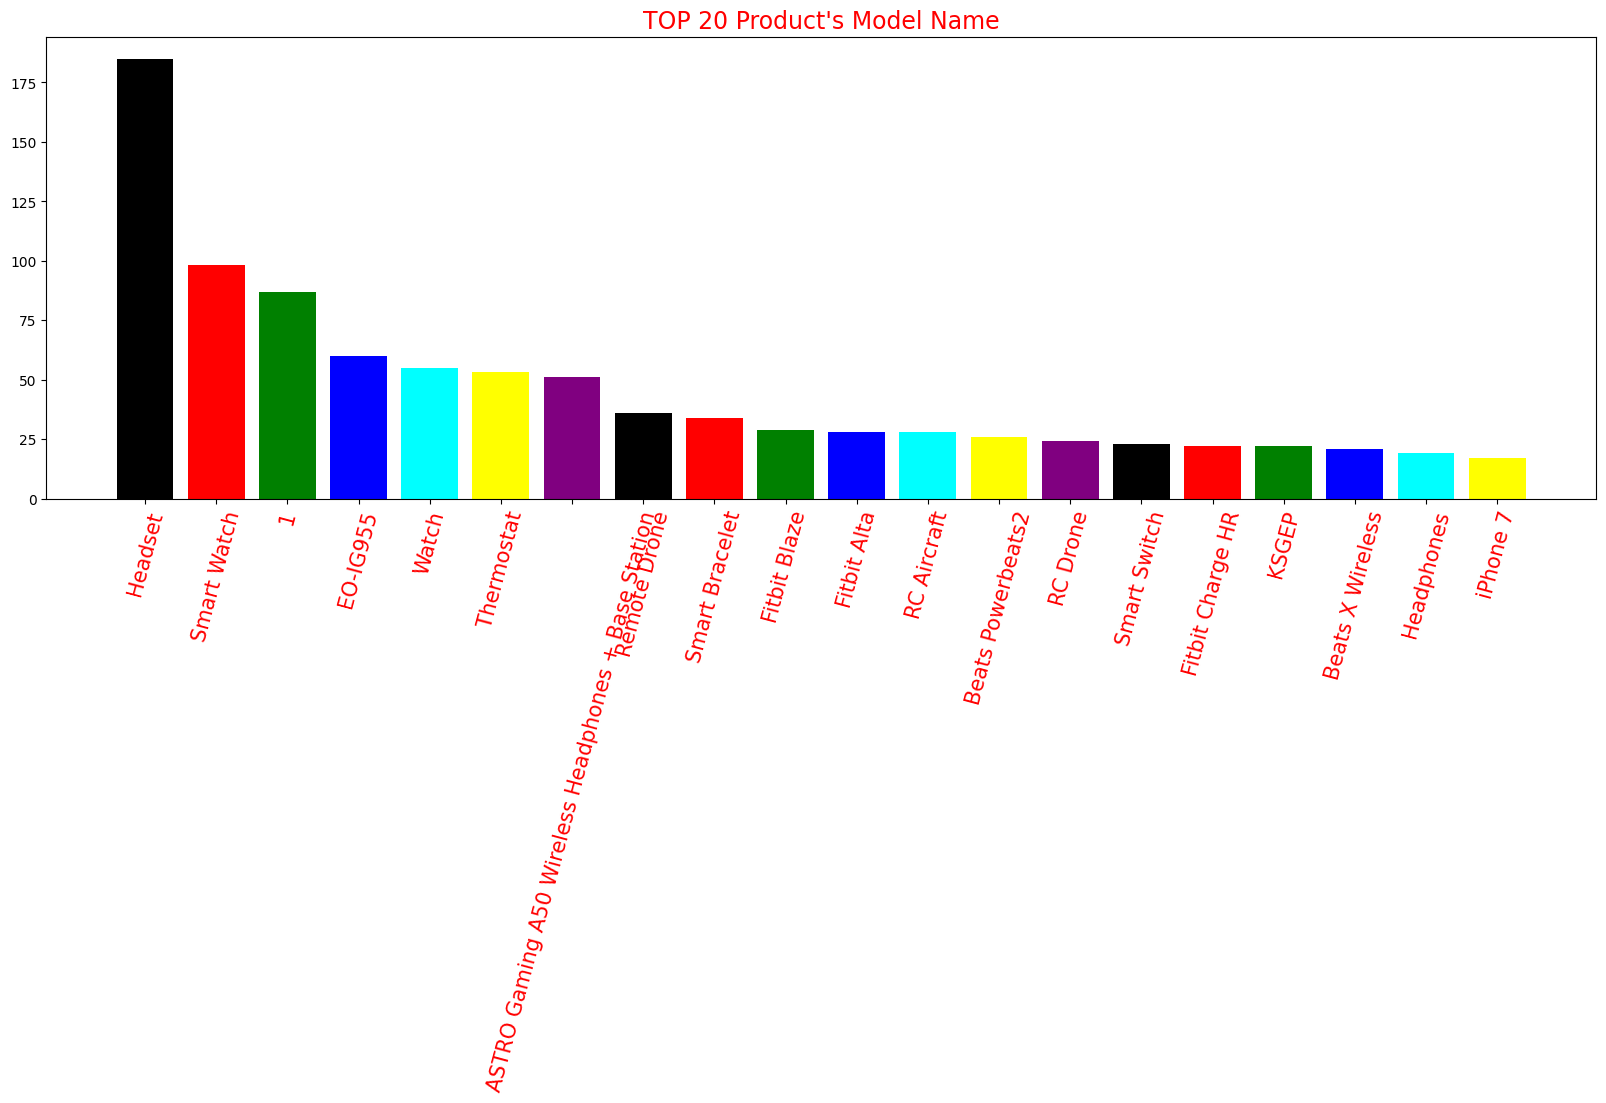

In [34]:
create_bar_plots(df_copy, "Model Name", "TOP 20 Product's Model Name")

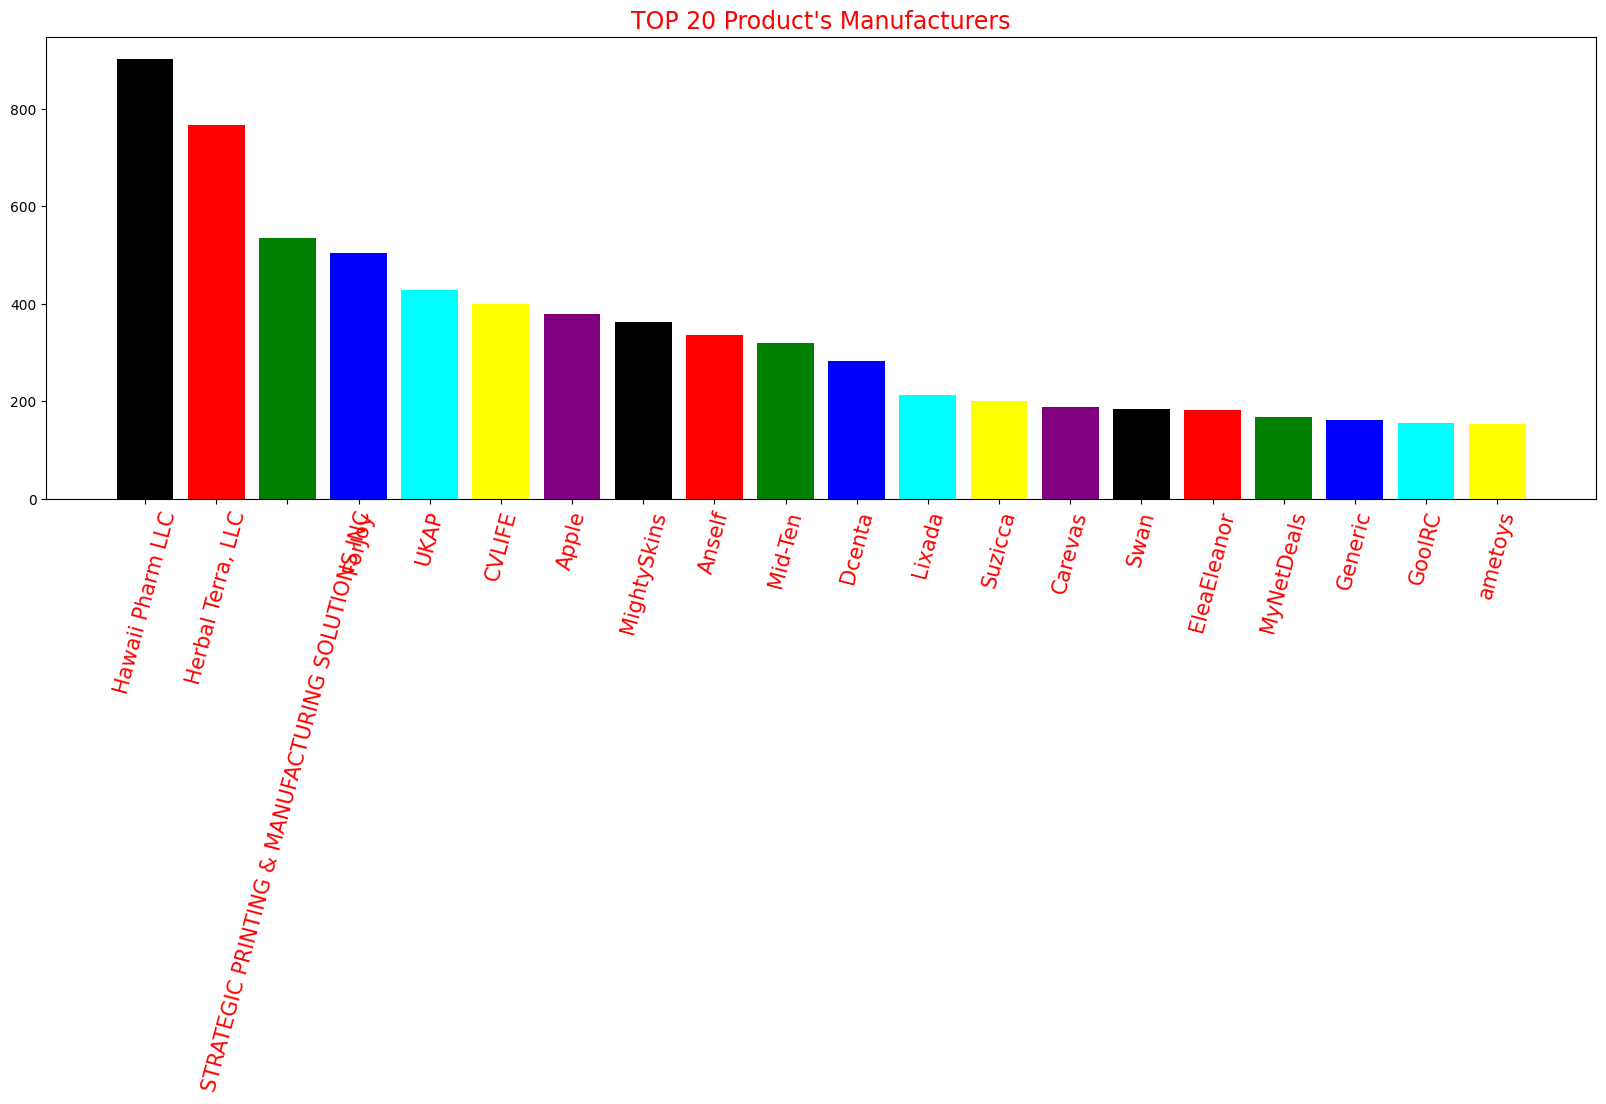

In [35]:
create_bar_plots(df_copy, "Manufacturer", "TOP 20 Product's Manufacturers")

In [36]:
# df_copy.columns


# Num Of Reviews, Number Of Ratings

# check the most popular product based on number of reviews
popular = df_copy[['Title' , 'Num Of Reviews']]
# sort
popular = popular.sort_values("Num Of Reviews" , ascending = False)

# checl top 15
popular[:15]

,Title,Num Of Reviews
9161,"VIZIO VIZIO 58"" Class 4K UHD LED Smartcast Sma...",33950.0
14050,"Clorox Clorox Disinfecting Wipes, Variety Pack...",25540.0
20724,Nexcare 3 Pack - Nexcare Waterproof Knee & Elb...,22916.0
9944,Nexcare 6 Pack - Nexcare Waterproof Stays On B...,22829.0
18538,"Qunol Qunol Ultra CoQ10 100 mg Softgels, 30 Ct",14085.0
2262,"TCL TCL 65"" Class 4-Series 4K UHD HDR Roku Sma...",5029.0
16148,Roku Roku 4400R Roku 4 Streaming Media Player,3584.0
402,"VIZIO VIZIO 65"" Class 4K UHD Quantum Smartcast...",2978.0
6171,"VIZIO VIZIO 50"" Class 4K UHD Quantum SmartCast...",2952.0
20466,NaN,2952.0


Text(0.5, 1.0, '15 Most Popular Products based on reviews ')

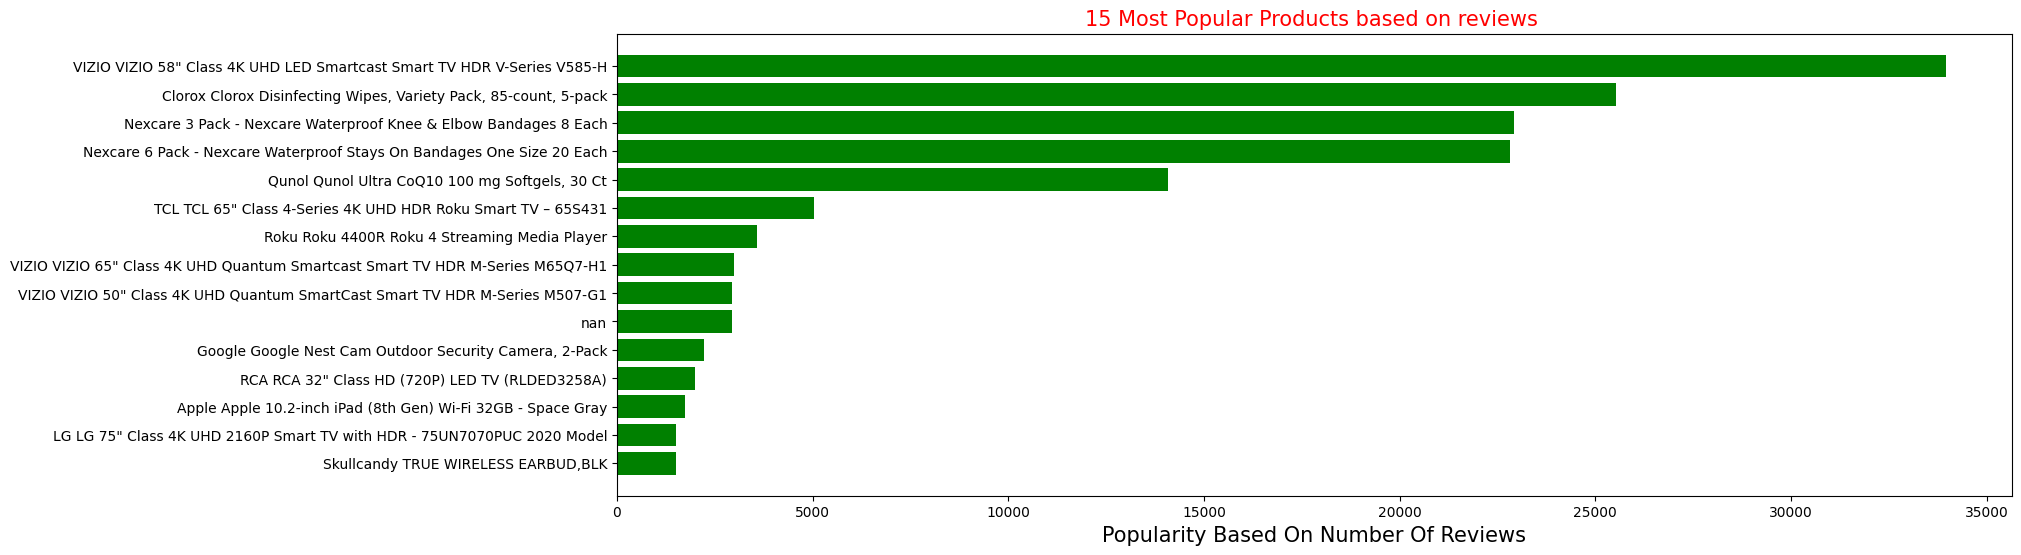

In [37]:
plt.figure(figsize=(18,6))
plt.barh(popular['Title'].astype("str")[:15] , 
         popular['Num Of Reviews'][:15] ,
         color='green',
        align='center')
plt.gca().invert_yaxis()
plt.xlabel("Popularity Based On Number Of Reviews" , fontsize=15)
plt.title("15 Most Popular Products based on reviews " , c ='r' , fontsize=15)

In [38]:
# function to create word cloud

def generate_word_cloud(data, col, title):
    """
    Returns a graph with the word cloud of the most frequently used word on the data passed.
    """
    word_cloud = wc.WordCloud(
        background_color="white"
        ,margin=20,
        width=900,
        height=700,
        prefer_horizontal=0.75,
        max_words=500,
        scale=2
        
    )
    #genererate 
    word_cloud.generate_from_text(" ".join([x for x in data[f'{col}'].astype(str)]))# generate_from_frequencies(all_counts)
    plt.figure(figsize=(14,8))
    plt.title(f"{title}" , fontsize=17 , c='r')
    plt.imshow(word_cloud)
    plt.show()

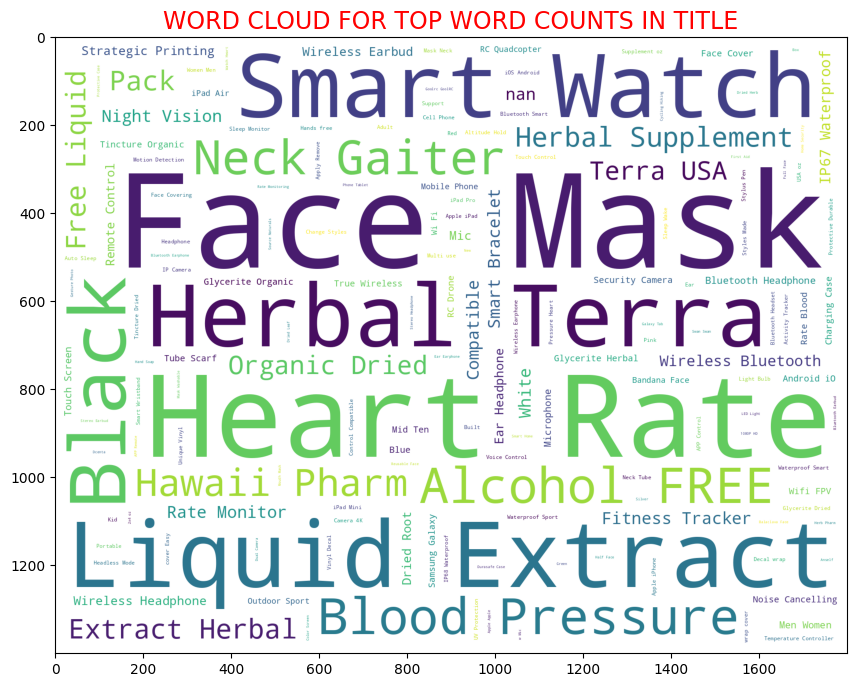

In [39]:
generate_word_cloud(df_copy, "Title",  "WORD CLOUD FOR TOP WORD COUNTS IN TITLE")

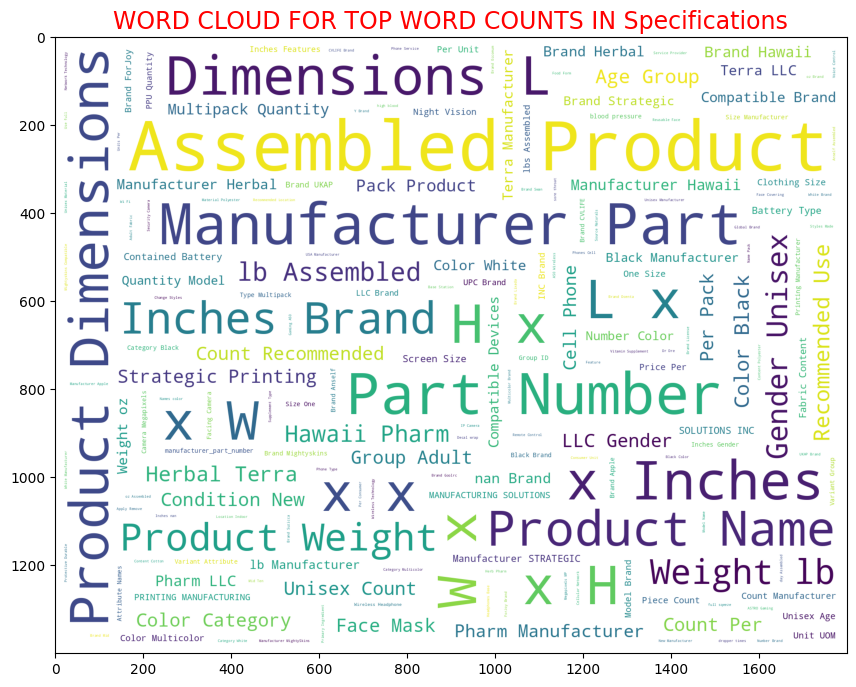

In [40]:
generate_word_cloud(df_copy, "Specifications",  "WORD CLOUD FOR TOP WORD COUNTS IN Specifications")

##  CREATING RECOMMENTATION ENGINE
---

- In this case, we will be using cosine similarity to get similarity between content of the products.
- TO vectorize text, we will use two methods i.e Either CountVectorizer or TFIDF vectorizer.
- Since the matrix is very long and getting similarity between the sparse matrix might require huge memory and computation, In this case, I will have to reduce the dimension of the dataset to about 100 features.
- These reduced features are the one to be used for recommendation purpose.

### Using Count Vectorizer.
- I will create a step by step process and then later on I will combine all of them to a single class which we can define the vectorizer and get the recommendation engine.
- Below is the step by step process.

### a. Creating Vectorization Matrix.
- Here we will use countvectorizer for this purpose.
- The clean_text column will be used as we have already procesed it.

In [41]:
#instantiating and generating the count matrix
count_vectorizer = CountVectorizer(encoding = 'utf-8',analyzer='word')

# fit the vectorizer and train on the data textual we processed
count_vec_matrix = count_vectorizer.fit_transform(df['clean_text'])



### Using Product Unique ID.
- The product Unique ID will be used to retrive products based on the similarities found.
- Lets create indices using it.

In [42]:
#create a Series for product id so that they will be used for retrival
indices = pd.Series(df.index)
indices[:5]

0    9b79f87a82b4ebfcfe1d9ecc72b9d832
1    cb4a40c55d58f0288ac0ff6d403f7e27
2    3bd097d980823e2a469237419dd6674d
3    4b58151b811a954f29e1e39290615fd4
4    d2238f0d3864e864c2579583aa2af7f7
Name: Uniq Id, dtype: object

In [43]:
df["clean_text"][288]

'amazing india organic ashwagandha root brand manufacturer assembled product dimensions inches'

### Create A dense Matrix.
- The results of the count vectorizer is a  sparse matrix.
- We convert it here into a dense array as follows

In [44]:
#Convert sparse count_vec_matrix to dense vector
dense_matrix = count_vec_matrix.todense()
dense_matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [45]:
#Print count_vec_matrix for 0th row
 #This shows all words and their frequency in bow of 0th row
print(count_vec_matrix[0,:])

  (0, 8367)	1
  (0, 9900)	1
  (0, 24852)	1
  (0, 14474)	1
  (0, 16562)	1
  (0, 1931)	1
  (0, 27034)	1
  (0, 27032)	1
  (0, 24389)	1
  (0, 15692)	1
  (0, 12469)	1
  (0, 7739)	1
  (0, 15459)	1
  (0, 8258)	1
  (0, 11048)	1
  (0, 17662)	1
  (0, 9118)	1


In [46]:
#Gives vocabulary of all words in 'description keywords' and their counts
# count_vectorizer.vocabulary_

### Dimension Reductions.
- Since it will be costly running the whole matrix, we will reduce its dimension to atleast 100 features using TruncatedSVD method for dimension reduction

In [47]:
# define the object for dimension reduction
truncator = TruncatedSVD(n_components = 100)

# reduce the data into few dimension
# we are converting the results to float32
reduced_product_matrix =  truncator.fit_transform(count_vec_matrix).astype('f')

In [48]:
reduced_product_matrix[1]

array([ 2.1887648e+00, -9.7278619e-01, -1.1597887e+00, -1.2083411e-01,
        9.3071014e-01,  3.0650368e-01, -8.6861330e-01, -6.9623941e-01,
        1.9004339e-02,  2.7317426e-01,  3.0822864e-01, -1.0311832e-01,
       -1.4819628e+00,  5.6171262e-01, -1.1900781e+00, -2.0306875e-01,
        6.1755979e-01,  2.1866529e-01,  1.5951149e-01,  2.4821566e-01,
       -3.3953466e-02, -3.1092998e-01,  1.3547520e-01, -7.1543016e-02,
       -1.0193799e-01,  3.1398100e-01,  2.9806852e-01,  3.7853809e-03,
       -1.8825433e-01, -1.5433484e-01, -5.4535609e-01, -2.8152211e-02,
       -6.4319768e-03,  7.4116021e-02, -2.7461335e-01,  3.4364539e-01,
       -4.1495073e-01,  1.3549533e-01, -1.1410749e-01, -2.4195915e-01,
        3.6772153e-01,  2.0537058e-01,  1.0352672e-01, -2.6545379e-01,
        1.2620245e-01,  6.9479644e-02, -6.6882081e-02,  1.4482164e-01,
        1.2168894e-02, -5.6454867e-02,  7.3433824e-02,  6.3151322e-02,
        6.8717830e-02,  1.8989788e-04, -1.0441163e-01,  6.5093631e-01,
      

### Cosine Similarity Process.
- The data received by the dimension reduction object is going to be used here.
- We are getting similarities between these data features with its i.e A product against each other.

In [49]:
#generating the cosine similarity matrix
cosine_sim_perfomances = cosine_similarity(reduced_product_matrix, reduced_product_matrix)
cosine_sim_perfomances

array([[1.        , 0.09583327, 0.07582571, ..., 0.11795956, 0.16814859,
        0.13673916],
       [0.09583327, 0.9999998 , 0.38981697, ..., 0.38180983, 0.1017998 ,
        0.42226875],
       [0.07582571, 0.38981697, 1.0000002 , ..., 0.6884075 , 0.4746056 ,
        0.7450298 ],
       ...,
       [0.11795956, 0.38180983, 0.6884075 , ..., 1.0000006 , 0.46783125,
        0.7378729 ],
       [0.16814859, 0.1017998 , 0.4746056 , ..., 0.46783125, 1.        ,
        0.63422143],
       [0.13673916, 0.42226875, 0.7450298 , ..., 0.7378729 , 0.63422143,
        0.9999999 ]], dtype=float32)

### Recommender Using the similarities above.
- Here using the Indices and the similarities matrix, they will be helping in getting the most similar products.
- The first step is to get the title and product description of the product someone is using or has entered its id. After this, the two (title and product description are processed and then passed to the recommender and help get the best product).
- Below is the function that does this;

In [50]:
# create a functioon that receives product Id and use it to get requeired product information and then process it.
def get_product_description(df, product_id):
    try:
        return df["clean_text"].loc[product_id]
    except Exception as e:
        print("Product Not Found, Randomly recommending")
        return "missing product"


In [51]:
indices[indices == '5ab6135295d7b85f8779f0258199703f'].index[0]

28923

In [52]:
# the function takes product id and returns the products that are most similar to it as recommendation based on their content or titile/descriptiom
def run_recommendations(product_id, n, cosine_sim = cosine_sim_perfomances):
    # a list to hold the product to be recommended
    recommended_products = []
    similarity_scores =[]
    
    #get index of the product that matches the id given
    idx = indices[indices == product_id].index[0]
    
    #find highest cosine_sim this product id shares with other product ids extracted earlier and save it in a Series
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    
    #get indexes of the 'n' most similar products
    top_n_indexes = list(score_series.iloc[1:n+1].index)
    
    #populating the list with product ids of n matching product
    for i in top_n_indexes:
        recommended_products.append(list(df.index)[i])
        similarity_scores.append(score_series[i])
    return similarity_scores, recommended_products

In [53]:
# run a sample recommendations
scores, idxs = run_recommendations("9b79f87a82b4ebfcfe1d9ecc72b9d832", 5)

idxs

['f690ea5d2a75d606a03ddd3f7c5a8968',
 '861817d8b93ce24796697da1caa81d8f',
 'cae85051d260576a7da8f1a5cdad8e62',
 'ed3a4572477b38869f749b7d303cc54a',
 'd182cebf2ba93a62ac44b047ad895853']

In [54]:
# get scores
scores

[1.0, 0.87416327, 0.8454346, 0.8373359, 0.82775927]

In [55]:
# compair the description title of the product with recommended to see if there are similaries

# what product was input"
df_copy[df_copy['Uniq Id'] == "9b79f87a82b4ebfcfe1d9ecc72b9d832"][COLS]["Title"].values

array(['Barka Ave Barka Ave Case for Samsung Galaxy Tab A 10.1 Inch 2019 SM-T515/T510 Rugged Heavy Duty Armor Hard Back Cover Case with Kickstand'],
      dtype=object)

In [56]:
# what product was recommended
for x in df_copy[df_copy['Uniq Id'].isin(idxs)]["Title"]:
    print(x)
    print()

Barka Ave Barka Ave Case for Samsung Galaxy Tab A 10.1 Inch 2019 SM-T515/T510 Rugged Heavy Duty Armor Hard Back Cover Case with Kickstand

V.I.P. Galaxy Tab A 8.0 2019 Rugged Case with Kickstand,SM-T290 SM-T295, Poetic Full Body Shockproof Cover, Built-in-Screen Protector, Revolution, for Samsung Galaxy Tab A Tablet 8.0 Inch (2019), Blue/Gray

MIARHB For Samsung Galaxy Tab S5e 10.5 T720 T725 Zipper Canvas Sleeve Bag Case Cover

TOP SHE Case for Samsung Galaxy Tab A 10.1-inch SM-T510 T515 T517 (2019 Release), Lightweight Kids Child Shockproof Case with Handle Kickstand Full Protective Back Cover, PINK

MOSISO Mosiso Case for Samsung Galaxy S20, S20 Plus, S20 Ultra (2020 Release), Shockproof Soft TPU Bumper Hard PC Back Anti-Scratch Shell Protective Clear Phone Case Cover for Samsung Galaxy, Clear



### FINAL RECOMMENDATION ENGINE.
- All the above process are going to be combined.
- In this case, an engine where processed data can be passed will be created.
- This engine has all the processes defined. It has a function to create similarity matric, and also to get recommendations from products.

In [57]:
# first delete above variables that takes alot of space.
del reduced_product_matrix
del cosine_sim_perfomances

In [58]:
# recommendation for
# create engine for the recommendation

class ContentBasedRecommendorSystem:
    """
    A ENGINE FOR WALMART PRODUCT RECOMENTATION
    @process --> getVectors --> dimension reduction --> cosine similarity --> get indexes or recommented products
    """
    def __init__(self, vect_type ='count', n_dim=50):
        """
        Constructor..
        Initialises vectorizer .
        The vectorizer removes english stopwords from the word that were not removed
        """
        print("****** SYSYTEM ENGINE INITIATED *******\n")
        #define vectorizer

        self.vect_type = vect_type
        self.n_dim = n_dim

        #CHECK THE VECTORIZER BEING USED.
        if self.vect_type =='count':
            print("Using Count Vectorizer as Vectorizer")
            self.vect = CountVectorizer(encoding = 'utf-8', stop_words="english" ,analyzer='word')
        else:
            print("Using TFIDF Vectorizer as Vectorizer")
            self.vect = TfidfVectorizer(analyzer = 'word',stop_words="english", encoding = 'utf-8')
    

    def fit(self,df, column):
        """
        This function performs main process of the engine.
        Creates a model and return  similarity indexes or the recommended
        """
        self.df =df
        #get the index as a product id
        if "Uniq Id" in df.columns:
            self.df.set_index("Uniq Id", inplace=True)
        else:
            pass
        # fit 
        data = df[f'{column}']
        # fill nulls with a value.

        #fill all nulls with missing product keyword incase it is not present
        data.fillna("This product does not have any descriptions" , inplace = True)
        
        #convert the vectorizer
        self.vect.fit(data.values)
        # transform the data
        self.tf_df = self.vect.transform(data.values)
        #reduce the matrix
        self.reduced_matrix = self.dimension_reduction(self.tf_df)
        print("Done wit dimension reduction")
    
        # Compute the cosine similarity matrix
        self.cos_similarity  = cosine_similarity(self.reduced_matrix , self.reduced_matrix)
        
        # create a new series for holding product id and index in small case
        self.recomender_indices = pd.Series(df.index)
    
    def dimension_reduction(self , sparse_matrix):
        """
        Perfoms Dimension reduction by reducing the prodcut matrix dimension to 100 by default.
        """
        print("Started Dimension Reduction")
        trancator = TruncatedSVD(n_components = self.n_dim)
        return trancator.fit_transform(sparse_matrix).astype('f')
        			

    def Weight_Rating_score(self ,data):
        """
        This functions is used incase title provided by useris not found in the available database.
        It uses averaging of the rating score and return top 15% product
        """
        #get the percentile for top recommentation
        x_percent = data['Num Of Reviews'].quantile(0.85)
        #mean
        MEAN = data['Average Rating'].mean()
        votes = data['Number Of Ratings']
        vote_avg = data['Average Rating']
        # votes based recommentation
        return (votes/(votes+1+x_percent) * vote_avg) + (x_percent/(x_percent+votes+1) * MEAN)
        

    def predict(self , product_id , numbers=5):
        """
        Function to return recomended products
        """
        print("****** THE FOLLOWING ARE RECOMMENDATIONS **********")
        
        # a list to hold the product to be recommended
        recommended_products = []
        similarity_scores = []
        try:
            #get index of the product that matches the id given
            idx = self.recomender_indices[self.recomender_indices == product_id].index[0]

            #find highest cosine_sim this product id shares with other product ids extracted earlier and save it in a Series
            score_series = pd.Series(self.cos_similarity[idx]).sort_values(ascending = False)

            #get indexes of the 'n' most similar products
            top_n_indexes = list(score_series.iloc[1:numbers + 1].index)

            #populating the list with product ids of n matching product
            for i in top_n_indexes:
                recommended_products.append(list(df.index)[i])
                similarity_scores.append(score_series[i])
        except Exception as e:
            print("error Occured recommending based on popularity")
            #create a new feature score
            new_df = self.df.copy()
            new_df['score'] = self.Weight_Rating_score(new_df)

            #get recommended products randomly from the top 100 ranked products
            return [0 for _ in range(numbers)], new_df.sort_values(by= 'score', ascending=False)["score"][:1000].sample(numbers).index.tolist()
            
        
        return similarity_scores, recommended_products

In [59]:
model_count_vec = ContentBasedRecommendorSystem(n_dim=40)

model_count_vec.fit(df, "clean_text")

****** SYSYTEM ENGINE INITIATED *******

Using Count Vectorizer as Vectorizer
Started Dimension Reduction
Done wit dimension reduction


### Test the Engine on some few examples

In [60]:
d_scores, d = model_count_vec.predict("d6a18f190e0b66ea1e280a356ac73b37")

d, d_scores

****** THE FOLLOWING ARE RECOMMENDATIONS **********


(['4b30b23070af226537286aedb2fcaed6',
  'efc647d7378c06b866d5b9fe67b477cd',
  '92757f12c647e1227fc57ad6cd181b5b',
  'cc91d4e198298a12d28bb059a0ca8b13',
  'd9bb171d62a5da2533cd903ce7b815a8'],
 [0.97932535, 0.97483206, 0.97238123, 0.97172207, 0.9628093])

In [61]:
# set the index for the copy we stored as product id
df_copy.set_index("Uniq Id", inplace=True)

In [62]:
df_copy.loc['d6a18f190e0b66ea1e280a356ac73b37']["Title"]

'Fonus Premium Retractable Headset MONO Hands-free Earphone Mic Single Earbud Headphone Wired 3.5mm Black D7 for LG G Pad 7.0 8.0 8.3 F 8.0 X8.3, G5 G6, Stylo 3, V10 V20 - Motorola Droid Turbo 2'

In [63]:
for pre in df_copy.loc[d]["Title"]:
    print(pre);print();

AWAccessory Wired Earbud Earphone w Mic Mono Headset 3.5mm Single Headphone Hands-free Q6O for Amazon Fire HD 8 Kids Edition, Kindle Fire HDX 7 HD 7 6 DX, Kids Edition 10 Kids Edition (2019)

Fonus Retractable Hands-free Headset with Mic 3.5mm Earphone TYPE-C Audio Adapter Peemium Sound Headphone Converter Earbud Black QAA for Motorola Moto Z Play Droid

OdeMobile Compatible With Moto G7 Power - Flat Wired Headset MONO Hands-free Earphone w Mic Single Earbud Headphone K7L for Motorola Moto G7 Power

AWAccessory Flat Wired Headset MONO Hands-free Earphone w Mic Single Earbud Headphone Earpiece Y1G Compatible With Google Pixel 3a XL

AWAccessory Wired Earphone Mono Headset Single Earbud 3.5mm Headphone Flat In-Ear Z1B for ZTE Axon M, Blade Force, ZPad 8, Overture 3, Avid 4



In [64]:
# try with product id not present
model_count_vec.predict("product_id not present")

****** THE FOLLOWING ARE RECOMMENDATIONS **********
error Occured recommending based on popularity


([0, 0, 0, 0, 0],
 ['5a035de384d7019052ccdb16882179c0',
  '87143232ab1de140fd8e173f2d30cf8c',
  '7e9b5b16a563cb730d468dfb1d20f283',
  'e1b963156ac2b0d1ddae3c5b37f63d53',
  '4de6376596c132a1119d3807635fe529'])

### 2. Train the Engine Using TFIDF vectorizer.
- In this case, istead of using default engine which is count vectorizer, we change it to TFIDF vectorizer.

In [65]:
# model_tfidf_vec = ContentBasedRecommendorSystem(vect_type ='tfidf', n_dim=50)

# model_tfidf_vec.fit(df, "clean_text")

In [66]:
# test also this model
# d1 = model_tfidf_vec.predict("013ec32e468dd845721b1bb8b87d8622")

# d1

In [67]:
# check the titile
# df_copy.loc['d6a18f190e0b66ea1e280a356ac73b37']["Title"]

In [68]:
# # check the details of recommnedated products
# for pre in df_copy.loc[d1]["Title"]:
#     print(pre);print();

In [69]:
#save the engine for usage on the endpoint
# pd.to_pickle(model_tfidf_vec, "tfidf_engine.pkl")

pd.to_pickle(model_count_vec, "count_engine.pkl")

### Using KNN model for Recommendation.


### Collaborative Filtering Using k-Nearest Neighbors (kNN)
- kNN is a machine learning algorithm to find clusters of similar data points based on their closeness proximity. It is based on the distance between the data points.
- It make predictions using  top-k nearest neighbors i.e we calculate the distance between each of the product against what we are checking then sort them and select top most k products that has the closed distance.

#### Working Pipeline for KNN model.
- The working pipeline will involve the following process.
    1. Convert the documents about description into a numerical vector using either CountVectorizer or TFIDF Vectorizer.
    2. Reduce the SIze of the Vector returned above using TruncatedSVD algorithm
    3. Define a NearestNeighbors model and Train it on the reduced vectorizer.
    4. Use the trained model to get recommendation of top n products for a specific product selected.
    5. We might compaired the returned product ID with What could have been returned Cosine Similarity ALgorithm Above.

- Below is the implimentation of the above steps.

In [70]:
# import the knn algorithm
from sklearn.neighbors import NearestNeighbors

In [71]:
# we are going to use the same reduce matrix as above, latter we will create a classs for it.

#instantiating and generating the count matrix
count_vectorizer = CountVectorizer(encoding = 'utf-8',analyzer='word')

# fit the vectorizer and train on the data textual we processed
count_vec_matrix = count_vectorizer.fit_transform(df['clean_text'])


# define the object for dimension reduction
truncator = TruncatedSVD(n_components = 100)

# reduce the data into few dimension
# we are converting the results to float32
reduced_product_matrix =  truncator.fit_transform(count_vec_matrix).astype('f')

In [72]:
# Using NearestNeighbors model and kneighbors() method to find k neighbors.
# Setting n_neighbors = 5 to find 5 similar products 
# Using auto algorthm to decide on the best algorith to be used for getting k neighbours
neigh_on_count_vec = NearestNeighbors(n_neighbors=5, algorithm='auto')

# train the algorithm
neigh_on_count_vec.fit(reduced_product_matrix)

NearestNeighbors()

In [73]:
# let assume we have product Id as 013ec32e468dd845721b1bb8b87d8622, use it to get products recommendation

product_id = "013ec32e468dd845721b1bb8b87d8622"

# get the details of the items with this product id

product_desc = df.loc[product_id]['clean_text']
product_desc

'forjoy smart watch card message bluetooth connectivity smartwatch brand'

In [74]:
# transform the above into a vector
prod_mtx = count_vectorizer.transform([product_desc])
prod_mtx.todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [75]:
# reduce the dimension using the trucated svd object trained above
prod_mtx_reduced = truncator.transform(prod_mtx).astype("f")
prod_mtx_reduced

array([[ 7.02906728e-01,  8.01098645e-02, -1.93034872e-01,
         1.15014195e+00, -3.48417386e-02, -8.01971480e-02,
        -3.22031736e-01, -1.75184920e-01, -1.18984329e-02,
        -2.55596382e-03, -1.64510950e-01, -1.82746738e-01,
        -5.22045000e-03,  2.25243345e-01, -8.61932859e-02,
        -3.29625338e-01, -3.16210166e-02, -4.27385867e-02,
        -3.26639801e-01,  1.04656324e-01, -4.95889753e-01,
        -3.06454688e-01, -1.55464560e-01, -6.24275804e-01,
         3.57325584e-01, -8.42854679e-02,  1.52905881e-01,
         1.16407208e-01, -1.67971849e-01,  8.25415924e-02,
         2.53737092e-01, -1.32821053e-01, -2.23095119e-02,
         1.36963978e-01, -1.14382263e-02, -1.23120397e-01,
        -8.84106457e-02, -4.73532706e-01,  1.53348044e-01,
        -1.49833560e-01, -2.35659778e-01,  2.94267118e-01,
        -3.10331404e-01,  7.01176226e-02,  2.81926543e-01,
         2.39128038e-01, -5.89456931e-02,  8.25352520e-02,
        -1.62073731e-01,  1.05234012e-01, -6.62919804e-0

In [76]:
# get recommende product indexes
distances, indices_preds = neigh_on_count_vec.kneighbors(prod_mtx_reduced)
indices_preds, distances

(array([[ 9373, 17328, 20364, 13623, 27475]]),
 array([[4.21468485e-08, 5.51897987e-01, 5.70261783e-01, 9.58289895e-01,
         1.08544818e+00]]))

In [77]:
# get recommended product indexes
distances, indices_preds = neigh_on_count_vec.kneighbors(prod_mtx_reduced)

# convert distances to similarity scores
similarity_scores = 1 / (1 + distances)
indices_preds, similarity_scores

(array([[ 9373, 17328, 20364, 13623, 27475]]),
 array([[0.99999996, 0.64437225, 0.63683649, 0.51064962, 0.47951323]]))

In [78]:
# get the product IDs of the recommended product.
similarity_scores, df.index.values[list(indices_preds[0])]

(array([[0.99999996, 0.64437225, 0.63683649, 0.51064962, 0.47951323]]),
 array(['013ec32e468dd845721b1bb8b87d8622',
        '9a88e0c2ae5937656503c93093da92df',
        '6cd46e2963f4660f773def5939cd85b6',
        '4c0c2293ec525715a0fe556ecfa10e84',
        '26c344939773b63917a426ca2dc69665'], dtype=object))

In [79]:
# comparison with the cosine similarity algorithm trained above.
model_count_vec.predict("013ec32e468dd845721b1bb8b87d8622")

****** THE FOLLOWING ARE RECOMMENDATIONS **********


([0.9896546, 0.98467326, 0.9781176, 0.9697239, 0.94497216],
 ['6cd46e2963f4660f773def5939cd85b6',
  '9a88e0c2ae5937656503c93093da92df',
  '4c0c2293ec525715a0fe556ecfa10e84',
  '34610747504345225bcb5b821eada291',
  '26c344939773b63917a426ca2dc69665'])

#### Observation.
- Out of the 5 recommended product by COsine Similarity, It is seen that 4 of them are also recommended by KNN algorithm. THis shows that the two models are goood and can be used for this product recommendation

---


## BUilding Engine For Product Recommendation using NearestNeighbour Algorithm.
- In this case, I will be building the class as we did for Cosine similarity algorithm. This class will incoporate everything and will work as a pipeline where after training, someone can just get the information from it.
- SInce for the COsine We used CountVectorizer as the default algorithm, In this case, we will utilise TFIDF algorithm for the same purpose.


In [80]:
# recommendation for
# create engine for the recommendation

class NearestNeighboursContentBasedRecommendorSystem:
    """
    A ENGINE FOR WALMART PRODUCT RECOMENTATION
    @process --> getVectors --> dimension reduction --> cosine similarity --> get indexes or recommented products
    """
    def __init__(self, vect_type ='tfidf', n_dim=100):
        """
        Constructor..
        Initialises vectorizer .
        The vectorizer removes english stopwords from the word that were not removed
        """
        print("****** SYSYTEM ENGINE INITIATED USING NEAREST NEIGHBOURS ALGORITHM*******\n")
        #define vectorizer

        self.vect_type = vect_type
        self.n_dim = n_dim

        #CHECK THE VECTORIZER BEING USED.
        if self.vect_type =='count':
            print("Using Count Vectorizer as Vectorizer")
            self.vect = CountVectorizer(encoding = 'utf-8', stop_words="english" ,analyzer='word')
        else:
            print("Using TFIDF Vectorizer as Vectorizer")
            self.vect = TfidfVectorizer(analyzer = 'word',stop_words="english", encoding = 'utf-8')
    

    def fit(self,df, column):
        """
        This function performs main process of the engine.
        Creates a model and return  similarity indexes or the recommended
        """
        self.df =df
        #get the index as a product id
        if "Uniq Id" in df.columns:
            self.df.set_index("Uniq Id", inplace=True)
        else:
            pass
        # fit 
        data = df[f'{column}']
        # fill nulls with a value.

        #fill all nulls with missing product keyword incase it is not present
        data.fillna("This product does not have any descriptions" , inplace = True)
        
        #convert the vectorizer
        self.vect.fit(data.values)
        
        # transform the data
        self.tf_df = self.vect.transform(data.values)
        #reduce the matrix
        self.reduced_matrix = self.dimension_reduction(self.tf_df)
        print("Done wit dimension reduction")

        # Using NearestNeighbors model and kneighbors() method to find k neighbors.
        # Setting n_neighbors = 5 to find 5 similar products 
        # Using auto algorthm to decide on the best algorith to be used for getting k neighbours
        self.neigh_on_count_vec = NearestNeighbors(n_neighbors=5, algorithm='auto')

        # train the algorithm
        self.neigh_on_count_vec.fit(self.reduced_matrix)

        # create a new series for holding product id and index in small case
        self.recomender_indices = pd.Series(df.index)
    
    def dimension_reduction(self , sparse_matrix):
        """
        Perfoms Dimension reduction by reducing the prodcut matrix dimension to 100 by default.
        """
        print("Started Dimension Reduction")
        self.trancator = TruncatedSVD(n_components = self.n_dim)
        return self.trancator.fit_transform(sparse_matrix).astype('f')
        			

    def Weight_Rating_score(self ,data):
        """
        This functions is used incase title provided by useris not found in the available database.
        It uses averaging of the rating score and return top 15% product
        """
        #get the percentile for top recommentation
        x_percent = data['Num Of Reviews'].quantile(0.85)
        #mean
        MEAN = data['Average Rating'].mean()
        votes = data['Number Of Ratings']
        vote_avg = data['Average Rating']
        # votes based recommentation
        return (votes/(votes+x_percent) * vote_avg) + (x_percent/(x_percent+votes) * MEAN)
        

    def predict(self , product_id , numbers=5):
        """
        Function to return recomended products
        """
        print("****** THE FOLLOWING ARE RECOMMENDATIONS USING NEAREST NEIGHBOURS ALGORTHM **********")
        
        try:
            # get the product detrails with the id given
            product_desc = self.df.loc[product_id]['clean_text']
            # transform the above into a vector
            prod_mtx = self.vect.transform([product_desc])
            # reduce the dimension using the trucated svd object trained above
            prod_mtx_reduced = self.trancator.transform(prod_mtx).astype("f")
            # get recommende product indexes
            distances, indices_preds = self.neigh_on_count_vec.kneighbors(prod_mtx_reduced)
            # get the product IDs of the recommended product.
            return  1 / (1 + distances), self.df.index.values[list(indices_preds[0])]


        except Exception as e:
            print("error Occured recommending based on popularity")
            #create a new feature score
            new_df = df.copy()
            new_df['score'] = self.Weight_Rating_score(new_df)

            #get recommended products randomly from the top 100 ranked products
            return [0 for _ in range(numbers) ], new_df.sort_values(by= 'score', ascending=False)["score"][:1000].sample(numbers).index.tolist()

In [81]:
# define an engine using nn method
nn_engine = NearestNeighboursContentBasedRecommendorSystem()

# train the engine using the data we have
nn_engine.fit(df, 'clean_text')

****** SYSYTEM ENGINE INITIATED USING NEAREST NEIGHBOURS ALGORITHM*******

Using TFIDF Vectorizer as Vectorizer
Started Dimension Reduction
Done wit dimension reduction


In [82]:
# get predictions for the above id
pred_scores, preds = nn_engine.predict(product_id)
preds, pred_scores

****** THE FOLLOWING ARE RECOMMENDATIONS USING NEAREST NEIGHBOURS ALGORTHM **********


(array(['013ec32e468dd845721b1bb8b87d8622',
        '7623fd2aeb6451e5b751dbfb37ebffd6',
        '334f00d6335c9b323e305e57e7fd160a',
        'f1541e4d2097125f9eaa4f3e712458bb',
        '34610747504345225bcb5b821eada291'], dtype=object),
 array([[0.99999999, 0.77457417, 0.76236592, 0.75718894, 0.74260099]]))

In [83]:
# compaire the current title descriptions with the predicted products
df_copy.loc[f'{product_id}']["Title"]

'ForJoy Z60 Smart Watch With Sim Card Message Bluetooth Connectivity Smartwatch'

In [84]:
for pre in df_copy.loc[preds]["Title"]:
    print(pre);print();

ForJoy Z60 Smart Watch With Sim Card Message Bluetooth Connectivity Smartwatch

ForJoy New NFC Bluetooth Smart Watch Q18S with Camera Facebook Sync SMS MP3 Smartwatch Support 2G Sim TF Card for IOS&Android Phone

ForJoy Touch Screen Z60 Smart Watch Men with Bluetooth Phone Call 2G GSM SIM TF Card Camera Smartwatch Android Relogio Inteligente PK DZ09 Relogio

ForJoy T8 Bluetooth Smart Watch with Camera Music Player Facebook Whatsapp Sync SMS Smartwatch Support SIM TF Card for Android

ForJoy Smart Watch Z60 Metal Strap Bluetooth Wrist Smartwatch Support Sim TF Card Android Watch Multi-languages



In [85]:
# try with product id not present
nn_engine.predict("product_id not present")

****** THE FOLLOWING ARE RECOMMENDATIONS USING NEAREST NEIGHBOURS ALGORTHM **********
error Occured recommending based on popularity


([0, 0, 0, 0, 0],
 ['4d1aa3e8ceaeb1e4254620da57230e7d',
  '6f576fcba323dc541d9907cd7e5f48c6',
  '86002ccec44322e94c5f5ad5e44a255f',
  '3bf376bfd1c4664c90b3050fc907dd14',
  'e078a7e48689ec897678a4578cfc5707'])

In [86]:
nn_engine.predict("d6a18f190e0b66ea1e280a356ac73b37")

****** THE FOLLOWING ARE RECOMMENDATIONS USING NEAREST NEIGHBOURS ALGORTHM **********


(array([[0.99999999, 0.85492517, 0.85097413, 0.83876186, 0.83741766]]),
 array(['d6a18f190e0b66ea1e280a356ac73b37',
        '92757f12c647e1227fc57ad6cd181b5b',
        'cc91d4e198298a12d28bb059a0ca8b13',
        '4b30b23070af226537286aedb2fcaed6',
        'd9bb171d62a5da2533cd903ce7b815a8'], dtype=object))

In [87]:
# save the model for later usage
pd.to_pickle(nn_engine, "nn_engine.pkl")

# save the df_copy for later retrival of product information
pd.to_pickle(df_copy, "df_copy.pkl")

print("Done Saving")

Done Saving
